In [ ]:
#set up remote user permissions in phpmyadmin
#configure MySQL and firewall rules for remote connections on port 3306
# Ref - https://www.digitalocean.com/community/tutorials/how-to-allow-remote-access-to-mysql

In [1]:
import mysql.connector
import pandas as pd

#need to set up remote connections in phpmyadmin
# auth plugin added for 20.04
i40db = mysql.connector.connect(
  host="10.0.0.49",
  user="I40Remote",
  passwd="Password1",
  database="Industry40db",
  auth_plugin='mysql_native_password'
)


df = pd.read_sql('SELECT * FROM roomData', con=i40db)

# view first 5 records in DataFrame
df.head()

,id,roomName,humidity,temperature,outsideTemp,CO2,readDate
0,1,E223,47.63,27.64,None,None,2020-04-20 14:51:25
1,2,E223,47.58,27.60,None,None,2020-04-20 15:51:25
2,3,E223,47.52,27.63,None,None,2020-04-20 16:51:25
3,4,E223,48.62,28.61,None,None,2020-04-27 12:34:53
4,5,E223,48.58,28.62,None,None,2020-04-27 12:34:55


In [3]:
#close tcp connection
i40db.close()

In [5]:
df.tail()

,id,roomName,humidity,temperature,outsideTemp,CO2,readDate
4,5,E223,48.58,28.62,None,None,2020-04-27 12:34:55
5,6,E223,48.52,28.68,None,None,2020-04-27 12:34:57
6,7,E223,47.63,27.64,None,None,2020-04-27 12:44:46
7,8,E223,47.58,27.60,None,None,2020-04-27 13:44:46
8,9,E223,47.52,27.63,None,None,2020-04-27 14:44:46


In [6]:
print(df['readDate'])


0   2020-04-20 14:51:25
1   2020-04-20 15:51:25
2   2020-04-20 16:51:25
3   2020-04-27 12:34:53
4   2020-04-27 12:34:55
5   2020-04-27 12:34:57
6   2020-04-27 12:44:46
7   2020-04-27 13:44:46
8   2020-04-27 14:44:46
Name: readDate, dtype: datetime64[ns]


In [7]:
df.head()

,id,roomName,humidity,temperature,outsideTemp,CO2,readDate
0,1,E223,47.63,27.64,None,None,2020-04-20 14:51:25
1,2,E223,47.58,27.60,None,None,2020-04-20 15:51:25
2,3,E223,47.52,27.63,None,None,2020-04-20 16:51:25
3,4,E223,48.62,28.61,None,None,2020-04-27 12:34:53
4,5,E223,48.58,28.62,None,None,2020-04-27 12:34:55


In [8]:
#drop empty columns (axis = 1) in place ie in the Dataframe
df.drop('outsideTemp', axis=1, inplace=True)
df.drop('CO2', axis=1, inplace=True)
df.head()

,id,roomName,humidity,temperature,readDate
0,1,E223,47.63,27.64,2020-04-20 14:51:25
1,2,E223,47.58,27.60,2020-04-20 15:51:25
2,3,E223,47.52,27.63,2020-04-20 16:51:25
3,4,E223,48.62,28.61,2020-04-27 12:34:53
4,5,E223,48.58,28.62,2020-04-27 12:34:55


In [9]:
#add columns for Date and Time 
df['Date'] = df['readDate'].apply(lambda dt: dt.date())
df['Time'] = df['readDate'].apply(lambda dt: dt.time())
df.head()

,id,roomName,humidity,temperature,readDate,Date,Time
0,1,E223,47.63,27.64,2020-04-20 14:51:25,2020-04-20,14:51:25
1,2,E223,47.58,27.60,2020-04-20 15:51:25,2020-04-20,15:51:25
2,3,E223,47.52,27.63,2020-04-20 16:51:25,2020-04-20,16:51:25
3,4,E223,48.62,28.61,2020-04-27 12:34:53,2020-04-27,12:34:53
4,5,E223,48.58,28.62,2020-04-27 12:34:55,2020-04-27,12:34:55


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

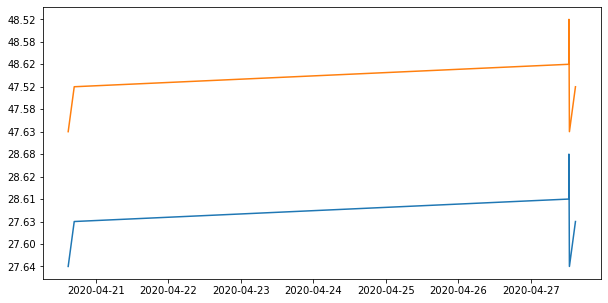

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
t = (df['readDate'])
ax.plot(t,df['temperature'], label='Temperature')
ax.plot(t,df['humidity'], label='Temperature')

In [13]:
df.dtypes

id                      int64
roomName               object
humidity               object
temperature            object
readDate       datetime64[ns]
Date                   object
Time                   object
dtype: object

In [29]:
# - https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python
df['humidity'] = pd.to_numeric(df['humidity'])

In [30]:
df['temperature'] = pd.to_numeric(df['temperature'])

In [31]:
df.dtypes

id                      int64
roomName               object
humidity              float64
temperature           float64
readDate       datetime64[ns]
Date                   object
Time                   object
dtype: object